<a href="https://colab.research.google.com/github/SaiVamshiKatkuri/MLnow_2.0/blob/main/3_2_Univariate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Topic**: `Univariate Linear Regression`

[Link to download the Dataset](https://www.kaggle.com/mustafaali96/weight-height?select=weight-height.csv)

**Date Created** :June 11,2021

**AUTHOR**: Sai Vamshi Katkuri
[Assessment Repository](https://github.com/SaiVamshiKatkuri/MLnow_2.0)

**Reach out** :[Email](https://mail.google.com/mail/u/0/?tab=rm&ogbl#inbox) | [Linkedin](https://www.linkedin.com/in/katkuri-sai-vamshi-2209281a8/) | [Github](https://github.com/SaiVamshiKatkuri)





## EDA and Univariate Modelling

## SETUP

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd '/content/drive/MyDrive/Datasets'

/content/drive/MyDrive/Datasets


In [ ]:
ls -a

Churn_Modelling.csv  student-por.csv            w-h.csv
student-mat.csv      univariate_MathData_2.csv


###We're  going to work on `w-h.csv (Weight-Height)`

## Data Preprocessing

In [3]:
# Import necessary libraries
import pandas as pd                    # For handling csv files(constructs dataframes)
import numpy as np                     # For scientific computations as well as hanlding arrays,vectors,tensors
import matplotlib.pyplot as plt        # For visualisation of Data
import seaborn as sns                  # For visualisation with different plots 
import tensorflow as tf                # Framework


In [5]:
dataset=pd.read_csv('w-h.csv')         # Reading the csv and creates a dataframe


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  5000 non-null   int64  
 1   Gender      5000 non-null   object 
 2   Height      5000 non-null   float64
 3   Weight      5000 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 156.4+ KB


In [7]:
dataset.shape                         # Shape of the Dataset

(5000, 4)

In [8]:
dataset=dataset.iloc[0:500,0:]        # Adjusting the samples from 5000 to 500

In [9]:
dataset.head(10)                      # Prints 10 rows from the top

,Unnamed: 0,Gender,Height,Weight
0,0,Male,73.847017,241.893563
1,1,Male,68.781904,162.310473
2,2,Male,74.110105,212.740856
3,3,Male,71.730978,220.042470
4,4,Male,69.881796,206.349801
5,5,Male,67.253016,152.212156
6,6,Male,68.785081,183.927889
7,7,Male,68.348516,167.971110
8,8,Male,67.018950,175.929440
9,9,Male,63.456494,156.399676


In [10]:
dataset.tail(10)                         # Prints ten rows from the bottom

,Unnamed: 0,Gender,Height,Weight
490,490,Male,68.792984,174.489486
491,491,Male,68.445747,183.783383
492,492,Male,69.201578,188.103506
493,493,Male,69.426017,176.193430
494,494,Male,69.606225,194.200712
495,495,Male,72.881707,194.199509
496,496,Male,62.178331,145.898842
497,497,Male,68.874707,191.833709
498,498,Male,71.080084,209.853554
499,499,Male,72.182534,201.261464


In [11]:
dataset.columns = ['S.no','Gender','Height','Weight']              #  Renaming columns

In [12]:
print(f"There are {len(dataset.columns)} columns in the dataset")  # Finding number of  cols
print(dataset.columns)

There are 4 columns in the dataset
Index(['S.no', 'Gender', 'Height', 'Weight'], dtype='object')


In [13]:
dataset=dataset.drop(['S.no','Gender'],axis=1)                     # Dropping Unnecessary cols

In [14]:
dataset.iloc[:,1:].describe()                                      # Basic analysis over the dataset

,Weight
count,500.000000
mean,187.141335
std,19.305476
min,135.655876
25%,173.027386
50%,186.885972
75%,200.038625
max,241.893563


In [15]:
dataset.isnull().sum()                                              # Checking Null values

Height    0
Weight    0
dtype: int64

## Data Visualisation

**Scatter Plot**

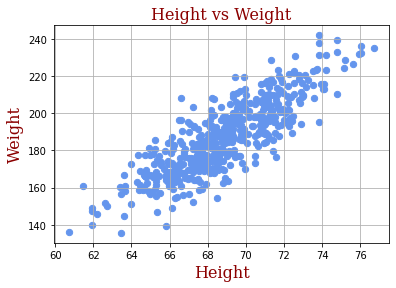

<Figure size 2880x2880 with 0 Axes>

In [16]:
plt.grid(True)
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }
plt.scatter(dataset['Height'],dataset['Weight'],s=40,color='cornflowerblue')
plt.title('Height vs Weight',fontdict=font)
plt.xlabel('Height',fontdict=font)
plt.ylabel('Weight',fontdict=font)
plt.figure(figsize=(40,40))
plt.show()

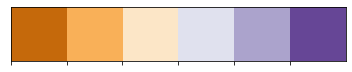

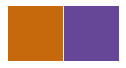

In [17]:
sns.palplot(sns.color_palette('PuOr')) #Purple to Orange colors
pal = sns.color_palette('PuOr', 6) #print 6 color shades from Purple to Orange
pal.as_hex() #set hex code values for colors

import matplotlib.pyplot as plt
plt.style.use(['seaborn'])
sns_colors = ['#c6690c', '#664697'] #orange Purple hex codes
sns.set_palette(sns_colors) #set the palette as sns_colors 
sns.palplot(sns.color_palette(sns_colors)) #plot the color codes

**Pair Plot**

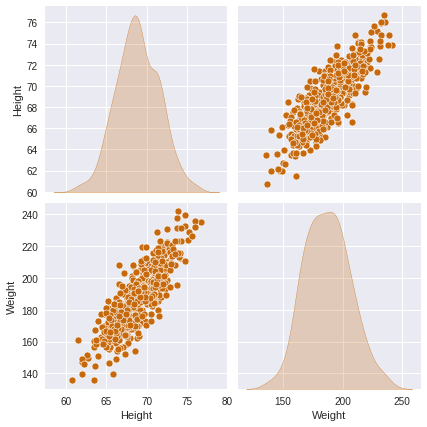

In [18]:

sns.pairplot(dataset,x_vars=['Height','Weight'],y_vars=['Height','Weight'],diag_kind='kde',palette="hls",height=3)


**Box Plot**

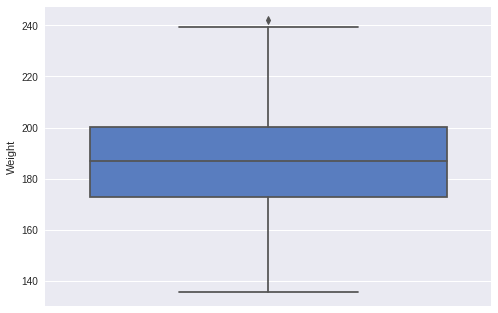

In [19]:

sns.boxplot(y=dataset['Weight'],palette='muted')

**Violin Plot**

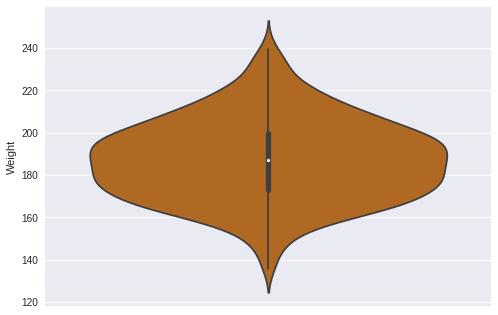

In [20]:
sns.violinplot(y=dataset["Weight"])

In [21]:
dataset.corr()                                          # Finding the correlation b/w variables

,Height,Weight
Height,1.000000,0.837903
Weight,0.837903,1.000000


**Heat Map**

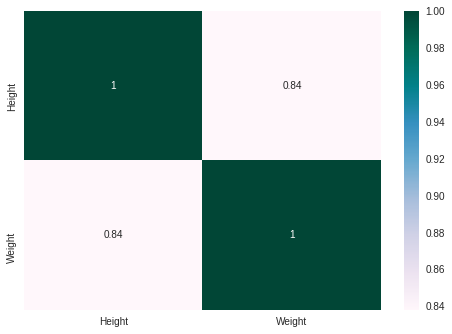

In [22]:
sns.heatmap(dataset.corr(),annot=True,cmap="PuBuGn")

*There exists a positive correlation between the variables `Height` and `Weight`*

# Data Split

In [65]:
trainDataset = dataset.sample(frac=0.8, random_state=0)                                  # Dividing datasets into parts (80% and 20%)
testDataset = dataset.drop(trainDataset.index)


In [66]:
print(f'After split the number of samples in trainDataset {trainDataset.shape[0]}')      # Counting the samples
print(f'After split the number of samples in testDataset {testDataset.shape[0]}')

After split the number of samples in trainDataset 400
After split the number of samples in testDataset 100


In [67]:
trainFeatures = trainDataset.copy()
testFeatures = testDataset.copy()

print(trainFeatures.head())
print(testFeatures.head())

        Height      Weight
90   71.815420  201.620667
254  69.164381  196.892315
283  66.414882  155.194772
445  71.433376  216.634000
461  66.676781  183.197307
       Height      Weight
9   63.456494  156.399676
25  68.144033  192.343977
28  67.421242  175.213922
31  74.033808  212.910225
32  71.528216  195.032243


In [68]:
trainLabels = trainFeatures.pop('Weight')
testLabels = testFeatures.pop('Weight')

print(trainLabels.head())
print(testLabels.head())

90     201.620667
254    196.892315
283    155.194772
445    216.634000
461    183.197307
Name: Weight, dtype: float64
9     156.399676
25    192.343977
28    175.213922
31    212.910225
32    195.032243
Name: Weight, dtype: float64


In [69]:
print(trainLabels.describe())


count    400.000000
mean     186.853132
std       19.441716
min      135.655876
25%      172.746315
50%      186.346299
75%      199.938897
max      241.893563
Name: Weight, dtype: float64


In [70]:
trainLabels_Original=trainLabels.copy()    #Lets store the original values as we're going to feature scale the column
print(trainLabels_Original.head())
testLabels_Original=testLabels.copy()
print(testLabels_Original.head())

90     201.620667
254    196.892315
283    155.194772
445    216.634000
461    183.197307
Name: Weight, dtype: float64
9     156.399676
25    192.343977
28    175.213922
31    212.910225
32    195.032243
Name: Weight, dtype: float64


###Feature Scaling

In [71]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
trainFeatures = sc.fit_transform(trainFeatures)
testFeatures = sc.transform(testFeatures)
sc_Labels=StandardScaler()
trainLabels=sc_Labels.fit_transform(trainLabels.values.reshape(-1,1))

testLabels=sc_Labels.transform(testLabels.values.reshape(-1,1))

### Training a Perceptron

In [41]:
model=tf.keras.models.Sequential()

In [42]:
model.add(tf.keras.layers.Dense(units=6, activation='relu'))   # Adding a hidden layer

In [43]:
model.add(tf.keras.layers.Dense(units=1))

In [44]:
model.compile(
    loss = 'mean_absolute_error', #minimizing the MAE loss
    optimizer = tf.keras.optimizers.Adam(0.001), #learning rate specified as 0.001
    # optimizer = 'adam', #takes the default learning rate
    metrics = ['mae', 'mse'] #meanSquare and meanAbsolute error metrics
)

In [45]:
numEpochs = 600
history = model.fit(x = trainFeatures, y = trainLabels, validation_data = (testFeatures, testLabels),epochs = numEpochs)

Epoch 1/600
13/13 [==============================] - 1s 19ms/step - loss: 1.1523 - mae: 1.1523 - mse: 2.0777 - val_loss: 1.0976 - val_mae: 1.0976 - val_mse: 2.0140
Epoch 2/600
13/13 [==============================] - 0s 3ms/step - loss: 1.1159 - mae: 1.1159 - mse: 1.9541 - val_loss: 1.0666 - val_mae: 1.0666 - val_mse: 1.9009
Epoch 3/600
13/13 [==============================] - 0s 3ms/step - loss: 1.0823 - mae: 1.0823 - mse: 1.8480 - val_loss: 1.0359 - val_mae: 1.0359 - val_mse: 1.7909
Epoch 4/600
13/13 [==============================] - 0s 3ms/step - loss: 1.0484 - mae: 1.0484 - mse: 1.7401 - val_loss: 1.0065 - val_mae: 1.0065 - val_mse: 1.6916
Epoch 5/600
13/13 [==============================] - 0s 3ms/step - loss: 1.0165 - mae: 1.0165 - mse: 1.6446 - val_loss: 0.9775 - val_mae: 0.9775 - val_mse: 1.5961
Epoch 6/600
13/13 [==============================] - 0s 4ms/step - loss: 0.9859 - mae: 0.9859 - mse: 1.5529 - val_loss: 0.9486 - val_mae: 0.9486 - val_mse: 1.5057
Epoch 7/600
13/13 [==

In [46]:
print(history)

In [47]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 12        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________


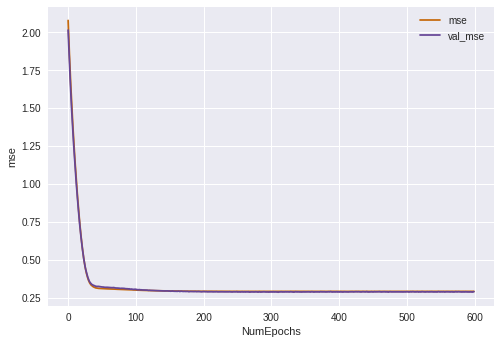

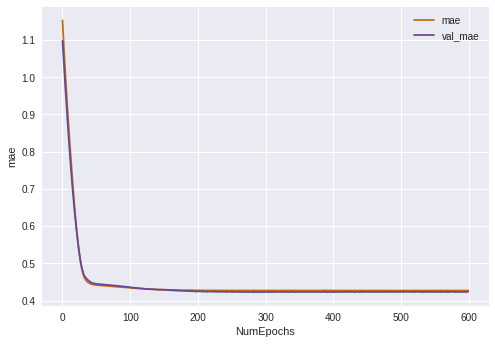

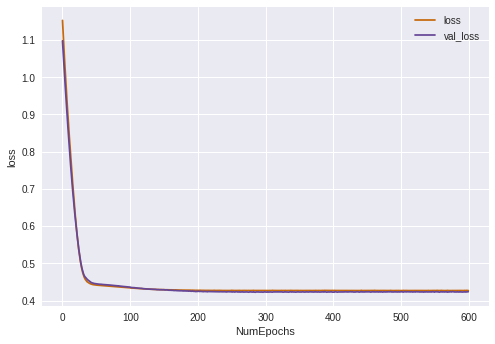

In [48]:
# tempString = 'mse'
def curvePlots(tempString):
  plt.plot(history.history[tempString])
  plt.plot(history.history[f'val_{tempString}'])
  plt.xlabel('NumEpochs')
  plt.ylabel(tempString)
  
  plt.legend([tempString, f'val_{tempString}'])
  plt.show()


curvePlots('mse')
curvePlots('mae')
curvePlots('loss')

In [72]:
testPreds = model.predict(testFeatures)
testPreds_Array=sc_Labels.inverse_transform(testPreds).flatten() #array of all prediction values


In [73]:
print(len(testPreds_Array))
print(testPreds_Array)

100
[155.98772 180.3576  176.49515 217.44684 203.6584  167.99011 160.31572
 165.24855 207.2051  176.01201 199.51044 190.4302  193.398   216.30396
 168.7675  186.69275 180.89429 165.07855 191.76736 184.27599 215.5284
 181.25284 204.63545 184.1456  199.65956 190.59894 167.98466 200.7623
 165.65733 175.49419 164.4733  180.54732 169.30644 180.9022  180.55371
 172.06468 181.12183 193.75613 210.65285 207.87665 227.96129 223.5388
 160.86377 197.03568 175.55904 187.79694 198.9507  180.82304 156.94536
 200.71387 163.51773 200.36157 207.68059 170.18105 179.774   199.6236
 221.58463 201.11978 190.92438 176.25539 204.9805  165.3286  200.3215
 204.8364  172.91165 197.46912 187.44695 197.95015 172.97287 188.56303
 204.58801 175.56529 181.83699 186.02155 181.10841 179.6681  175.6675
 168.02905 193.54146 198.63701 207.50725 168.62875 182.53172 179.09015
 174.84625 157.09099 189.72037 169.10016 188.08838 193.48238 211.54677
 206.01598 174.12094 182.14227 172.97166 187.14624 208.51414 166.08716
 201.902

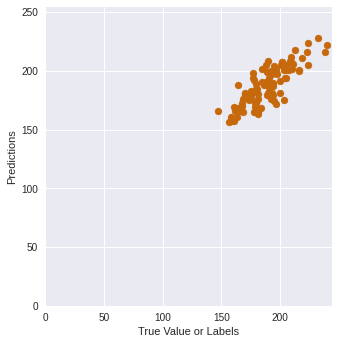

In [74]:
# prediciton plot --> how well is your model predicting across the actual labels

def predPlot(labels, predictions):
  plt.scatter(labels, predictions)
  plt.ylabel('Predictions')
  plt.xlabel('True Value or Labels')
  plt.axis('equal')
  plt.axis('square')
  plt.xlim([0, plt.xlim()[1]])
  plt.ylim([0, plt.ylim()[1]])
  plt.show()

predPlot(testLabels_Original, testPreds_Array)

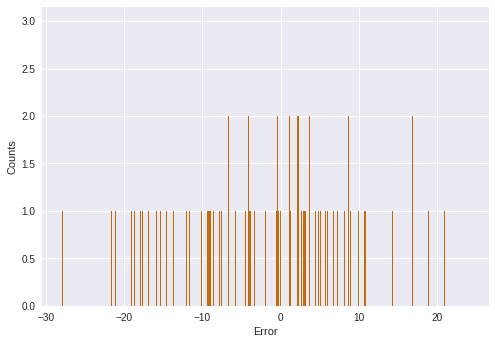

In [75]:

#error plot --> gaussian distribution 

def errorPlot(preds, labels, counts):
  errors = preds - labels
  plt.hist(errors, counts)
  plt.xlabel('Error')
  plt.ylabel('Counts')
  plt.show()

errorPlot(testPreds_Array, testLabels_Original, numEpochs)

# Using Other models on the dataset

## Simple Linear Regression

In [76]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(trainFeatures, trainLabels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [77]:
testPreds_LR = regressor.predict(testFeatures)
testPreds_LR_Array=sc_Labels.inverse_transform(testPreds_LR).flatten()   #Flattening to 1d array

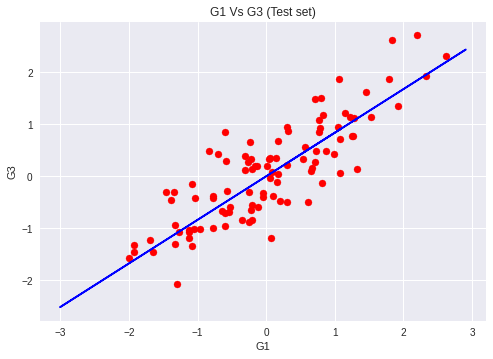

In [78]:
plt.grid(True)
plt.scatter(testFeatures, testLabels, color = 'red')
plt.plot(trainFeatures, regressor.predict(trainFeatures), color = 'blue')
plt.title('G1 Vs G3 (Test set)')
plt.xlabel('G1')
plt.ylabel('G3')
plt.show()

#Support Vector Machine

In [79]:
from sklearn.svm import SVR
SVM_regressor = SVR(kernel = 'rbf')
SVM_regressor.fit(trainFeatures, trainLabels)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [80]:
testPreds_SVM=SVM_regressor.predict(testFeatures)
testPreds_SVM_Array=sc_Labels.inverse_transform(testPreds_SVM).flatten()

In [81]:
CompareModels_df=pd.DataFrame({'testLabels':testLabels_Original,'testPreds':testPreds_Array,'testPreds_LR':testPreds_LR_Array,'testPreds_SVM':testPreds_SVM_Array})
print(CompareModels_df.head(15))

    testLabels   testPreds  testPreds_LR  testPreds_SVM
9   156.399676  155.987717    154.261263     157.088496
25  192.343977  180.357605    182.534349     181.006920
28  175.213922  176.495148    178.174808     175.273188
31  212.910225  217.446838    218.058772     220.470018
32  195.032243  203.658401    202.946192     201.177517
38  163.851825  167.990112    168.440342     168.528028
39  163.108017  160.315720    159.374164     162.850996
42  168.617746  165.248550    165.201584     167.024801
47  209.070863  207.205093    206.833479     204.553150
53  181.407679  176.012009    177.629488     174.681833
57  192.124847  199.510437    198.399875     198.810952
70  184.595608  190.430206    189.443343     191.357073
72  177.200929  193.397995    191.700438     194.070686
82  237.916736  216.303955    216.806138     218.674705
84  160.683917  168.767502    169.358717     168.937914


In [82]:
Errors_df=pd.DataFrame({'PerceptronError':abs(testLabels_Original-testPreds_Array),'LR_Error':abs(testLabels_Original-testPreds_LR_Array),'SVM_Error':abs(testLabels_Original-testPreds_SVM_Array)})
print(Errors_df.head(15))

    PerceptronError   LR_Error  SVM_Error
9          0.411960   2.138414   0.688820
25        11.986372   9.809627  11.337057
28         1.281225   2.960886   0.059265
31         4.536613   5.148547   7.559793
32         8.626158   7.913949   6.145274
38         4.138287   4.588517   4.676203
39         2.792298   3.733853   0.257021
42         3.369196   3.416162   1.592945
47         1.865770   2.237385   4.517713
53         5.395671   3.778192   6.725846
57         7.385590   6.275028   6.686105
70         5.834598   4.847734   6.761465
72        16.197066  14.499509  16.869757
82        21.612781  21.110598  19.242031
84         8.083585   8.674801   8.253998


# Rsquared test

In [83]:
r2_score_LR=regressor.score(testFeatures,testLabels)
print(r2_score_LR*100)

69.89451694217107


In [84]:
r2_score_SVM=SVM_regressor.score(testFeatures,testLabels)
print(r2_score_SVM*100)

68.87622702935187


` The model is performing well on Simple Linear Regression then SVM`

``` Predicting the target value with a single feature is insufficient and the loss is too high which can't be minimized in anyway ```
###### Multiple Features are must to train a good model. Hence on the above dataset I can't find anything that I can Improve.